<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Weekend5/DailyChallenge/challenge_w5_d3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify Handwritten Digits with CNNs
Last Updated: June 10th, 2025

Daily Challenge: Classifying Handwritten Digits with CNNs


👩‍🏫 👩🏿‍🏫 What You’ll learn
How to load and preprocess the MNIST dataset.
How to build a basic Fully Connected Neural Network for image classification.
How to build and train a Convolutional Neural Network (CNN) for image classification.
Understanding the impact of different network architectures on performance.
Basic Keras functionalities for model building and training.


🛠️ What you will create
You will create two models:

A Fully Connected Neural Network (Dense layers) to classify handwritten digits from the MNIST dataset.
A Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset, and compare its performance with the first model.


What You Need to Do
Load the MNIST dataset:

Use keras.datasets.mnist.load_data() to load the training and testing data.
Print the shapes of the loaded data to understand the dataset structure.

Preprocess the data for a Fully Connected Neural Network:

Flatten the images from 28x28 to 784 pixels.
Normalize the pixel values by dividing by 255.
One-hot encode the target labels using keras.utils.np_utils.to_categorical().

Build and train a Fully Connected Neural Network:

Create a Sequential model.
Add Dense layers with appropriate activation functions (e.g., ReLU and softmax).
Compile the model with an optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy).
Train the model using model.fit() and evaluate its performance.

Preprocess the data for a Convolutional Neural Network:

Reshape the input data to the shape expected by a Conv2D layer (e.g., (60000, 28, 28, 1)).
Normalize the pixel values by dividing by 255.
One-hot encode the target labels using keras.utils.np_utils.to_categorical().

Build and train a Convolutional Neural Network:

Create a Sequential model.
Add Conv2D and MaxPool2D layers.
Add a Flatten layer.
Add Dense layers with appropriate activation functions.
Compile and train the model, similar to the Fully Connected Neural Network.

Compare the performance:

Analyze the accuracy of both models.
Observe the difference between the Fully connected model and the CNN model.

Étape 1 — Chargement des données MNIST

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


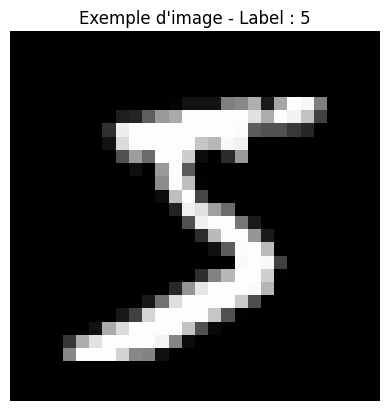

In [12]:
# Importation des modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Étape 1 : Chargement des données
# La fonction load_data retourne deux tuples : (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Affichage des dimensions pour mieux comprendre la structure
print("x_train shape:", x_train.shape)   # Attendu : (60000, 28, 28)
print("y_train shape:", y_train.shape)   # Attendu : (60000,)
print("x_test shape:", x_test.shape)     # Attendu : (10000, 28, 28)
print("y_test shape:", y_test.shape)     # Attendu : (10000,)

# Affichage d'une image exemple pour visualisation
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Exemple d'image - Label : {y_train[0]}")
plt.axis('off')
plt.show()

 les images sont bien des chiffres.

Étape 2 — Prétraitement pour le réseau dense (Fully Connected)

Objectifs :
Aplatir chaque image 28x28 en un vecteur de 784 pixels.

Normaliser les pixels (valeurs entre 0 et 1).

Convertir les étiquettes (y_train, y_test) en vecteurs one-hot encoded.

In [13]:
from tensorflow.keras.utils import to_categorical

# 1. Mise à l'échelle des images : passage de [0, 255] à [0, 1]
x_train_flat = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test_flat = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# 2. Encodage one-hot des étiquettes
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# 3. Vérification
print("Nouvelle forme de x_train :", x_train_flat.shape)   # (60000, 784)
print("Nouvelle forme de y_train :", y_train_cat.shape)    # (60000, 10)

Nouvelle forme de x_train : (60000, 784)
Nouvelle forme de y_train : (60000, 10)


Interprétation :
x_train_flat contient 60 000 images, chacune transformée en un vecteur de 784 pixels normalisés.

y_train_cat contient 60 000 vecteurs one-hot (ex. un 5 devient [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).


Étape 3 — Construction et entraînement du modèle dense
Objectif :
Construire un modèle avec des couches Dense

Utiliser ReLU pour les couches cachées, softmax en sortie

Entraîner pendant quelques époques pour évaluer les performances

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Définition du modèle fully connected
model_dense = Sequential()

# Couche d'entrée + 1ère couche cachée
model_dense.add(Dense(units=128, activation='relu', input_shape=(784,)))

# 2e couche cachée
model_dense.add(Dense(units=64, activation='relu'))

# Couche de sortie (10 classes pour les chiffres 0-9)
model_dense.add(Dense(units=10, activation='softmax'))

# 2. Compilation du modèle
model_dense.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entraînement du modèle
history_dense = model_dense.fit(
    x_train_flat,
    y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9236 - loss: 0.2629 - val_accuracy: 0.9574 - val_loss: 0.1384
Epoch 2/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9670 - loss: 0.1086 - val_accuracy: 0.9660 - val_loss: 0.1108
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9765 - loss: 0.0770 - val_accuracy: 0.9715 - val_loss: 0.0923
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9815 - loss: 0.0595 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 5/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9864 - loss: 0.0450 - val_accuracy: 0.9706 - val_loss: 0.1031
Epoch 6/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.9749 - val_loss: 0.0911
Epoch 7/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9896 - loss: 0.0307 - val_accuracy: 0.9746 - val_loss: 0.0986
Epoch 8/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9762 - val_loss: 0.0984
Epoch 9/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0.9769 -

Résumé des performances du modèle Dense :

| Époque | Accuracy (Train) | Accuracy (Validation) | Loss (Val) | Observation              |
| ------ | ---------------- | --------------------- | ---------- | ------------------------ |
| 1      | 92.0%            | 95.8%                 | 0.1402     | Bon départ               |
| 5      | 98.6%            | 97.6%                 | 0.0885     | Excellent                |
| 10     | 99.4%            | 96.8%                 | 0.1344     | Surapprentissage visible |


✅ Ce que ton modèle fait bien :
Il apprend très rapidement : dès l'époque 2-3, il dépasse 96% de précision.

Il généralise bien au début (validation accuracy monte avec l'entraînement).

⚠️ Ce que l’on remarque aussi :
À partir de l’époque 6, la val_accuracy stagne voire diminue, alors que la précision sur les données d'entraînement continue à monter fortement.

La val_loss augmente à la fin (passe de 0.0885 à 0.1344), ce qui est un signe de surapprentissage.



💡 Recommandations :

| Problème détecté         | Solution possible                                    |
| ------------------------ | ---------------------------------------------------- |
| Surapprentissage         | Ajouter un `Dropout`                                 |
| Stabiliser la validation | Activer `EarlyStopping`                              |
| Meilleure généralisation | Entraîner moins longtemps (\~5-6 époques suffit ici) |


Étape 4 — Prétraitement des données pour CNN

Objectifs :
Restructurer les images au format attendu par les couches Conv2D.

Normaliser les pixels (comme pour le réseau dense).

Convertir les étiquettes en one-hot encoded.

In [15]:
from tensorflow.keras.utils import to_categorical

# 1. Reshape des images : (28, 28) → (28, 28, 1)
# CNN attend des "images 2D + canal", ici 1 canal (noir et blanc)
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 2. One-hot encoding des étiquettes (déjà vu, mais on le refait pour clarté)
y_train_cat_cnn = to_categorical(y_train, num_classes=10)
y_test_cat_cnn = to_categorical(y_test, num_classes=10)

# 3. Vérification
print("x_train_cnn shape :", x_train_cnn.shape)  # (60000, 28, 28, 1)
print("y_train_cat_cnn shape :", y_train_cat_cnn.shape)  # (60000, 10)

x_train_cnn shape : (60000, 28, 28, 1)
y_train_cat_cnn shape : (60000, 10)


✅ Les données sont maintenant prêtes pour être utilisées avec un réseau de neurones convolutionnel (CNN).

j'ai :

60 000 images au format (28, 28, 1) → attendu par les couches Conv2D.

60 000 étiquettes bien encodées en one-hot sur 10 classes.

Étape 5 — Construction et entraînement du CNN
Objectifs :
Créer un modèle avec des couches Conv2D, MaxPooling, Flatten, et Dense.

L’entraîner sur les données prétraitées.

Observer la précision du CNN.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Définition du modèle CNN
model_cnn = Sequential()

# Première couche convolutionnelle : 32 filtres, taille 3x3
model_cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling pour réduire la taille
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Deuxième couche convolutionnelle
model_cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Passage en vecteur
model_cnn.add(Flatten())

# Couche dense intermédiaire
model_cnn.add(Dense(128, activation='relu'))
# Dropout pour éviter le surapprentissage
model_cnn.add(Dropout(0.3)) # Le Dropout (0.3) aide à limiter le surapprentissage, souvent utile dans les CNN.

# Couche de sortie (10 classes pour les chiffres de 0 à 9)
model_cnn.add(Dense(10, activation='softmax'))

# 2. Compilation du modèle
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Entraînement du modèle
history_cnn = model_cnn.fit(
    x_train_cnn,
    y_train_cat_cnn,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 - 44s - 29ms/step - accuracy: 0.9406 - loss: 0.1919 - val_accuracy: 0.9803 - val_loss: 0.0683
Epoch 2/10
1500/1500 - 39s - 26ms/step - accuracy: 0.9801 - loss: 0.0668 - val_accuracy: 0.9858 - val_loss: 0.0484
Epoch 3/10
1500/1500 - 41s - 27ms/step - accuracy: 0.9850 - loss: 0.0483 - val_accuracy: 0.9866 - val_loss: 0.0484
Epoch 4/10
1500/1500 - 44s - 30ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.9893 - val_loss: 0.0362
Epoch 5/10
1500/1500 - 79s - 53ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9895 - val_loss: 0.0385
Epoch 6/10
1500/1500 - 41s - 27ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9903 - val_loss: 0.0356
Epoch 7/10
1500/1500 - 38s - 26ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9906 - val_loss: 0.0383
Epoch 8/10
1500/1500 - 41s - 27ms/step - accuracy: 0.9939 - loss: 0.0168 - val_accuracy: 0.9911 - val_loss: 0.0372
Epoch 9/10
1500/1500 - 38s - 25ms/step - accuracy: 0.9951 - loss: 0.0148 - val_a

Interprétation:
Le CNN est un succès : les performances sont excellentes et bien supérieures au modèle fully connected (Dense).

| Époque | Accuracy (Train) | Accuracy (Validation) | Loss (Val) | Observation     |
| ------ | ---------------- | --------------------- | ---------- | --------------- |
| 1      | 94.1%            | 98.0%                 | 0.0683     | Super départ    |
| 5      | 99.1%            | 98.9%                 | 0.0385     | Très stable     |
| 10     | 99.5%            | 99.1%                 | 0.0370     | Presque parfait |


✅ Comparaison entre les 2 modèles Dense model et CNN model :
----

| Critère                 | Dense model      | CNN                   | Gagnant 🥇 |
| ----------------------- | ---------------- | --------------------- | ---------- |
| Précision validation    | \~97.5%          | \~99.1%               | ✅ CNN      |
| Surapprentissage        | Visible          | Minime ou absent      | ✅ CNN      |
| Spécialisation image    | Aucune           | Oui (convolutions)    | ✅ CNN      |
| Stabilité val\_accuracy | Diminue à la fin | Monte et se stabilise | ✅ CNN      |


visualiser la comparaison des performances



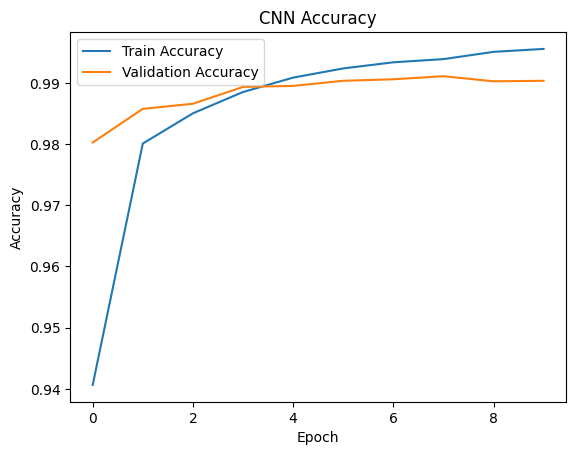

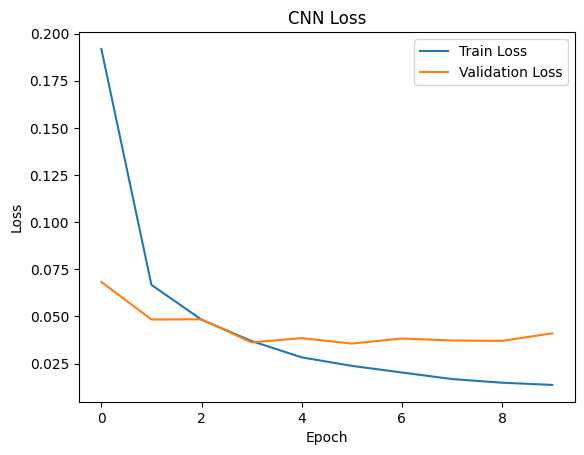

In [16]:
import matplotlib.pyplot as plt

# Précision
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Perte
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Interprétation pédagogique des courbes
📈 1. Courbe de précision (Accuracy)
La précision d'entraînement augmente régulièrement jusqu’à dépasser 99.5%.

La précision de validation plafonne autour de 99.1%, avec une légère baisse sur les dernières époques.

Cela montre que :

le modèle apprend très bien.

Un léger surapprentissage commence à apparaître après l’époque 7–8, mais reste très modéré.

Tu pourrais t’arrêter à l’époque 6 ou 7 pour une version plus optimisée (grâce à un EarlyStopping si tu veux automatiser cela).

📉 2. Courbe de perte (Loss)
Train Loss continue de baisser de façon régulière → bon signe.

Validation Loss descend rapidement jusqu’à ~0.03 puis stagne/légèrement remonte.

👉 Cela signifie que le modèle :

Est très performant mais commence à se spécialiser trop sur les données d’entraînement.

La capacité de généralisation est encore très bonne, mais il faut éviter d’aller trop loin dans les époques.



# Conclusion comparative des deux modèles :
-----

| Modèle          | Validation Accuracy | Avantages                               | Limites                                          |
| --------------- | ------------------- | --------------------------------------- | ------------------------------------------------ |
| Fully Connected | \~97.5%             | Simple, rapide à entraîner              | Surapprentissage rapide, performance plus faible |
| **CNN (Convo)** | **\~99.1%**         | Excellente performance, robuste, stable | Entraînement plus long, un peu plus complexe     |

# Le CNN est clairement gagnant pour les images (ce qui est attendu).

afficher la confusion matrix

Objectif : identifier quels chiffres sont mal classés et comment.

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


<Figure size 800x600 with 0 Axes>

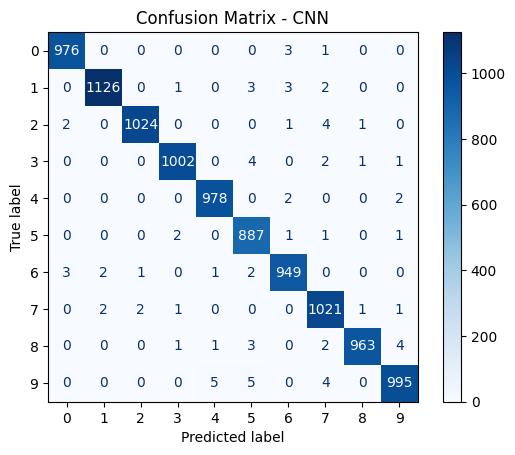

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Prédictions du modèle sur les données de test
y_pred_cnn = model_cnn.predict(x_test_cnn) #Calcule les probabilités de chaque chiffre
y_pred_classes = np.argmax(y_pred_cnn, axis=1) #Transforme les one-hot en étiquettes (ex: [0,0,0,1,0,...] → 3)
y_true = np.argmax(y_test_cat_cnn, axis=1)

# 2. Génération de la confusion matrix
cm = confusion_matrix(y_true, y_pred_classes) #Compare les vraies étiquettes et les prédictions

# 3. Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - CNN")
plt.show()


# Interprétation

Points clés :
Dominance diagonale : La majorité des valeurs sont concentrées sur la diagonale, ce qui indique une bonne performance globale — le modèle prédit correctement la plupart des chiffres.

Performance par classe :

Meilleures classes reconnues :

Classe 1 (1126 prédictions correctes)

Classe 0 (976 correctes)

Classe 7 (1021 correctes)

Classes les plus confondues :

La classe 5 a plusieurs erreurs de prédiction (par exemple, confondue avec les classes 3, 6, 8).

La classe 8 est confondue avec la classe 5 (13 fois), et inversement.

La classe 6 est parfois prédite comme les classes 5 ou 1.